In [27]:
#Importing related libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn import tree
import graphviz

In [2]:
data=pd.read_csv('Invistico_Airline.csv')

In [5]:
data.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [12]:
data.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

## Data Cleaning and Preparation

In [13]:
#Checking for NAN in our data frame
data.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

###### some

In [3]:
#Since we have over 120000 rows, we will drop NAN values and take a sample of 1000 row for this analysis
data=data.dropna()
df=data.sample(1000)

In [5]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.362000,1961.536000,2.784000,2.931000,2.849000,2.939000,3.202000,3.391000,3.523000,3.415000,3.4920,3.468000,3.68500,3.364000,3.698000,3.313000,14.171000,14.226000
std,15.133737,1010.597445,1.400466,1.537076,1.454756,1.272359,1.333031,1.365278,1.322581,1.327606,1.2512,1.323907,1.15113,1.258208,1.207582,1.301047,33.736893,33.878971
min,7.000000,50.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,27.000000,1386.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.0000,2.000000,3.00000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1922.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.0000,4.000000,4.00000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,50.000000,2496.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.0000,5.000000,5.00000,4.000000,5.000000,4.000000,13.000000,13.000000
max,78.000000,6117.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.00000,5.000000,5.000000,5.000000,293.000000,302.000000


In [6]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
31902,dissatisfied,Male,Loyal Customer,55,Personal Travel,Eco,1839,3,5,4,...,2,2,5,4,4,5,5,2,0,0.0
50804,dissatisfied,Male,disloyal Customer,36,Business travel,Eco,1366,3,0,3,...,1,1,4,2,1,2,1,1,0,0.0
11723,dissatisfied,Male,Loyal Customer,68,Personal Travel,Eco,1506,2,3,2,...,3,1,1,1,4,3,3,1,3,0.0
90169,satisfied,Male,Loyal Customer,53,Business travel,Eco,1167,4,2,2,...,4,4,1,5,4,2,5,4,0,0.0
80646,dissatisfied,Female,Loyal Customer,45,Business travel,Eco,430,3,1,1,...,3,3,3,3,3,3,3,1,50,40.0


# Correlation matrix

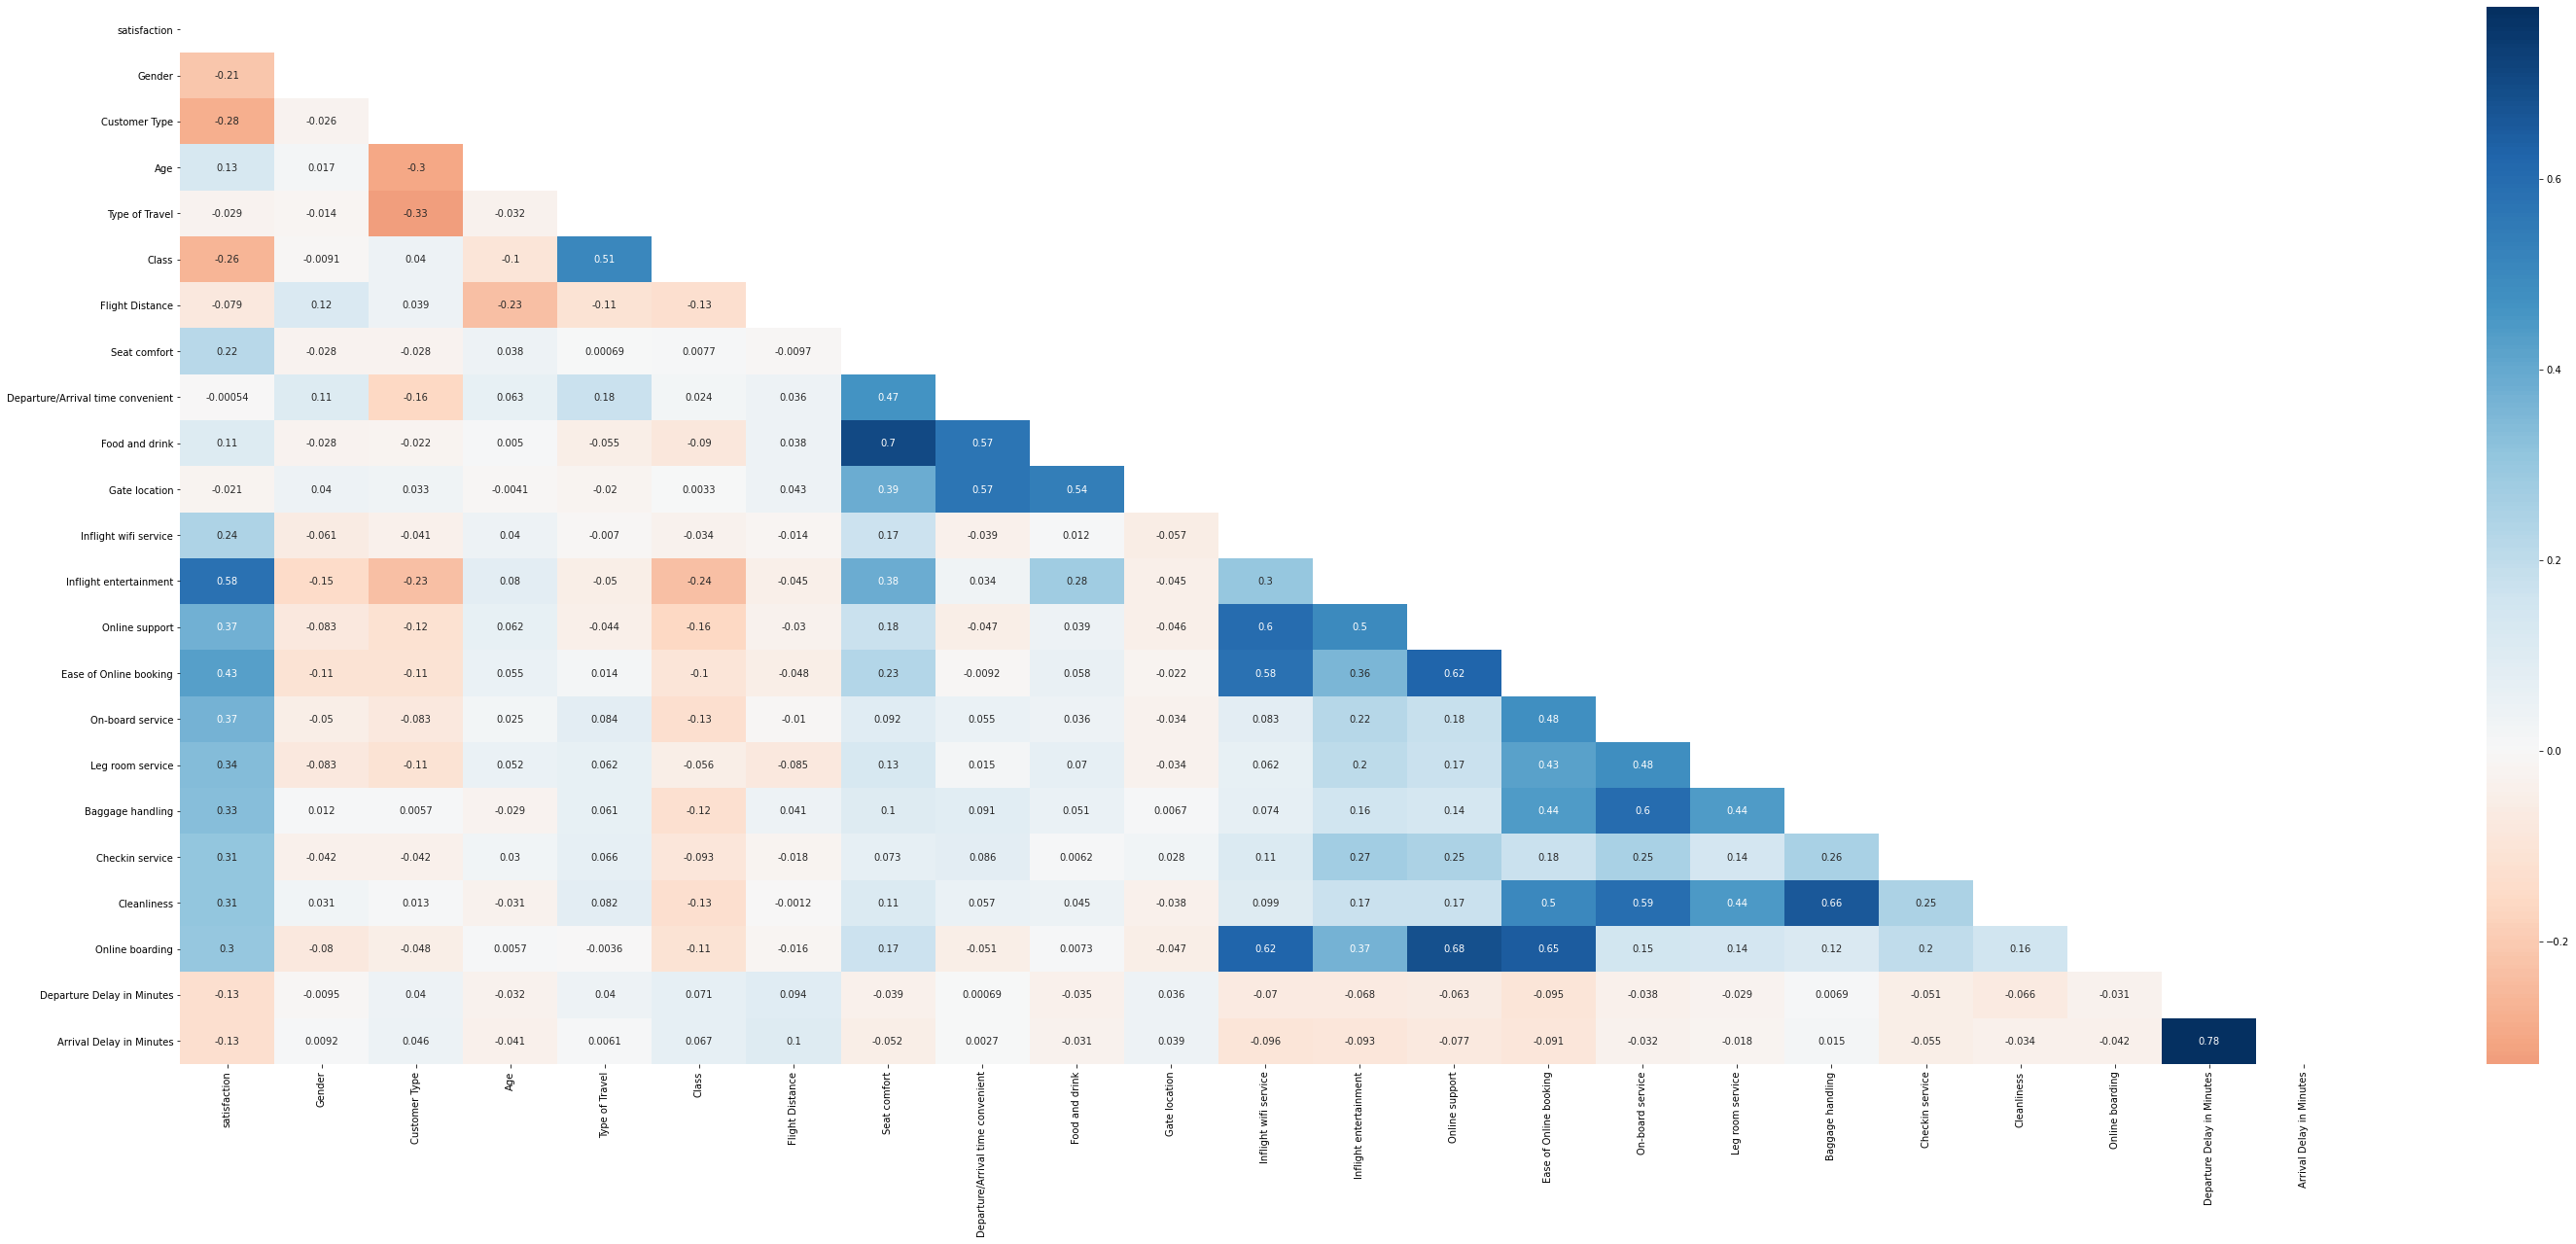

In [30]:
# Plotting the Upper Triangle of the co-relation matrix:
corr= df.corr('spearman')
fig=plt.figure(figsize=(50, 20))
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, center=0, cmap='RdBu');


In [32]:
corr.iloc[:,0].sort_values()

Customer Type                       -0.280453
Class                               -0.261413
Gender                              -0.212358
Departure Delay in Minutes          -0.128147
Arrival Delay in Minutes            -0.126675
Flight Distance                     -0.079040
Type of Travel                      -0.028835
Gate location                       -0.020668
Departure/Arrival time convenient   -0.000541
Food and drink                       0.107260
Age                                  0.127967
Seat comfort                         0.220658
Inflight wifi service                0.240888
Online boarding                      0.300061
Checkin service                      0.306243
Cleanliness                          0.312187
Baggage handling                     0.330929
Leg room service                     0.338562
On-board service                     0.373249
Online support                       0.374742
Ease of Online booking               0.431043
Inflight entertainment            

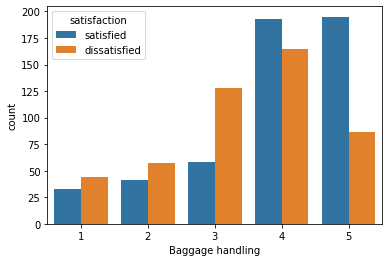

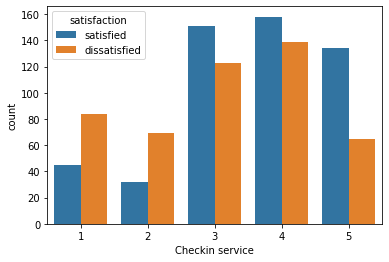

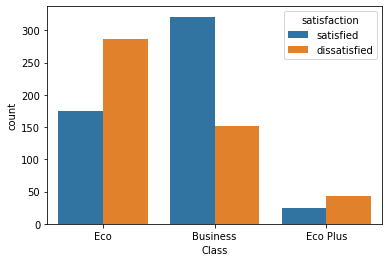

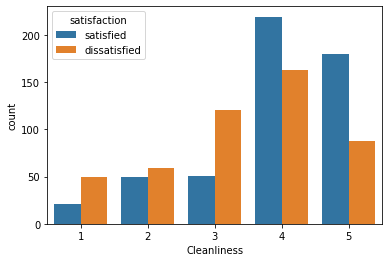

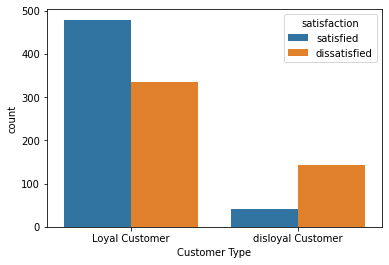

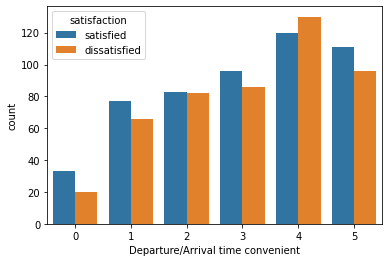

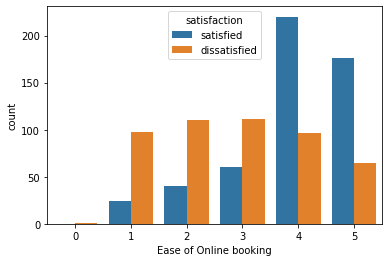

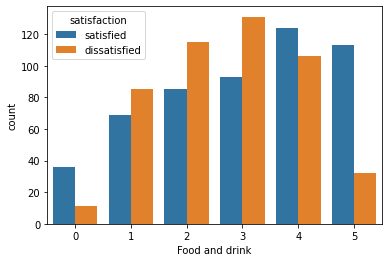

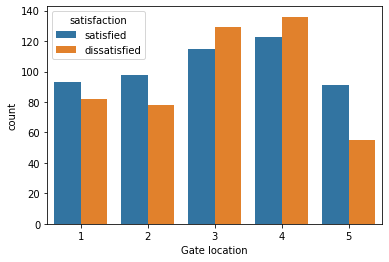

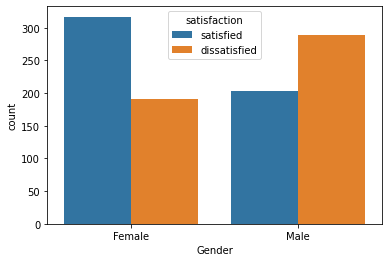

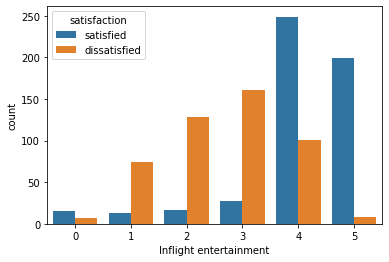

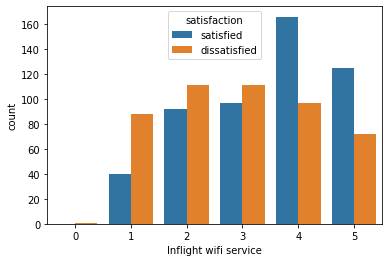

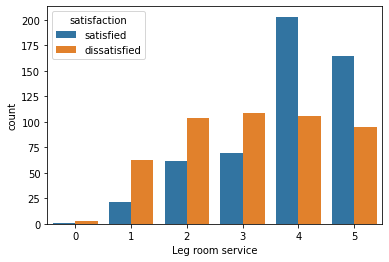

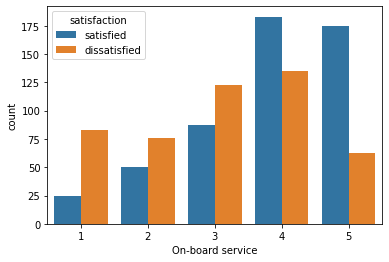

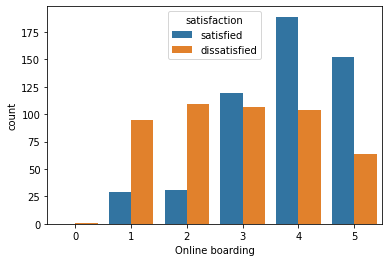

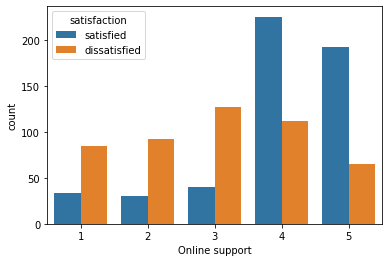

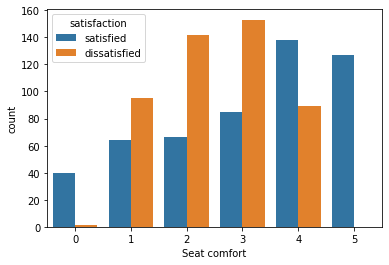

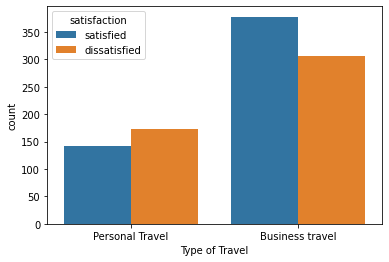

In [198]:
for col in np.setdiff1d(df.columns[1:],['Age','Flight Distance','Departure Delay in Minutes' ,'Arrival Delay in Minutes'] ):
    sns.countplot(x = col,hue='satisfaction', data = df)
    plt.show()

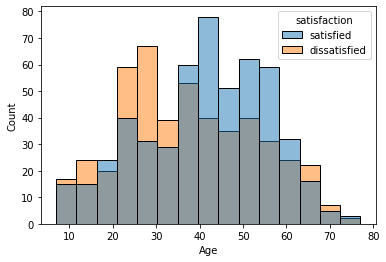

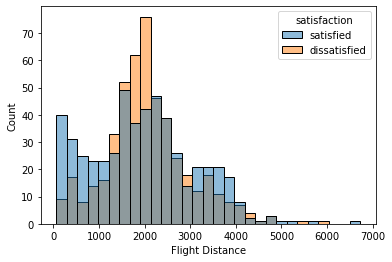

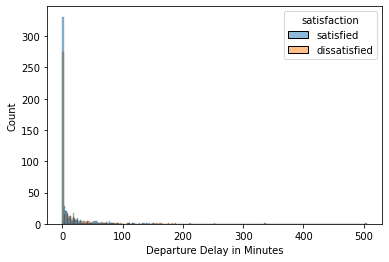

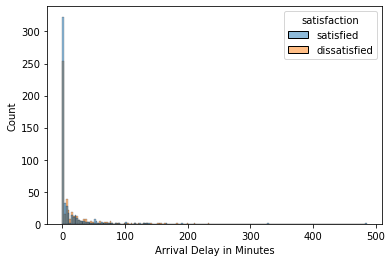

In [194]:
for col in ['Age','Flight Distance','Departure Delay in Minutes' ,'Arrival Delay in Minutes']:
    sns.histplot(x=df[col].astype(int), hue=df.satisfaction) 
    plt.show()

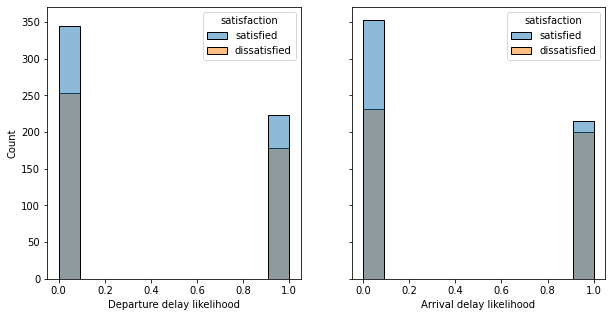

In [7]:
'''  It seems that both Departure Arrival Delays follow an exponential distributios, thus we will visualize 
their commulitative probability instead which is representative of liklihood of the delay from 0 to 1: '''


from scipy import stats
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))

l_d=df['Departure Delay in Minutes'].mean()
l_a=df['Arrival Delay in Minutes'].mean()
sns.histplot(ax=ax1,x=1-np.exp(-l_d*df['Departure Delay in Minutes']), hue=df.satisfaction, data=df).set(xlabel='Departure delay likelihood')
sns.histplot(ax=ax2,x=1-np.exp(-l_a*df['Arrival Delay in Minutes']), hue=df.satisfaction, data=df).set(xlabel='Arrival delay likelihood');

# Classification algorithms

### Data preparation

In [17]:
df=data.sample(100000)
#Encoding categories:
encoder = preprocessing.LabelEncoder()
for col in df.columns:
    if df[col].dtype==object:
        encoder.fit((df[col] ) )
        df[col]=encoder.transform(df[col])        
#Preparing training and testing sets:
X=df.iloc[:,1:]
y=df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic regression

In [18]:
#Standarizing data imputs: 
X= preprocessing.StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
b_clf = LogisticRegression()
b_clf.fit(X_train, y_train)
y_logistic= b_clf.predict(X_test)
#Creating normed confusion matrix
cm = confusion_matrix(y_test,y_logistic)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

In [19]:
print('Score of the logistic regression is %.2f' % round(b_clf.score(X_test, y_test)*100,2),'%\n')
print(classification_report(y_logistic, y_test)+'\n\n')
print(pd.DataFrame(confusion_matrix(y_test,y_logistic),columns=['Predicted Negative','Predicted Postive'],index=['Negative','Positive']))
print('MAE = ', mean_absolute_error(y_test, y_logistic))

Score of the logistic regression is 83.90 %

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      9048
           1       0.86      0.85      0.85     10952

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000



          Predicted Negative  Predicted Postive
Negative                7469               1640
Positive                1579               9312
MAE =  0.16095


### Decision tree

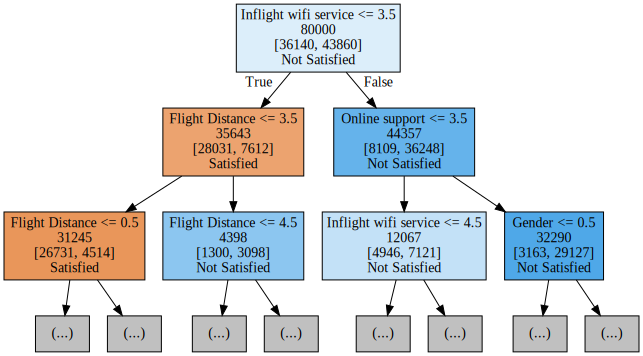

In [21]:
#Applying the algorithm
X=df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_tree=clf.predict(X_test)
#Creating normed confusion matrix
cm2 = confusion_matrix(y_test,y_tree)
cm2_norm = cm2 / cm2.sum(axis=1).reshape(-1,1)
#Visualizing a part of the decision tree
tree.export_graphviz(clf, out_file='tree.dot', max_depth=2, feature_names=df.columns[:-1], class_names=['Satisfied','Not Satisfied'], label=False,impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [22]:
print('Score of the decision tree is %.2f' % round(clf.score(X_test, y_test)*100,2),'%\n')
print(classification_report(y_tree, y_test)+'\n\n')
print(pd.DataFrame(confusion_matrix(y_test,y_tree),columns=['Predicted Negative','Predicted Postive'],index=['Negative','Positive']))
print('MAE = ', mean_absolute_error(y_test, y_tree))

Score of the decision tree is 93.82 %

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      9169
           1       0.95      0.94      0.94     10831

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



          Predicted Negative  Predicted Postive
Negative                8587                654
Positive                 582              10177
MAE =  0.0618


### SVM

In [23]:
#Since SVM is very slow, we take only 5000 data point     
df=df.sample(5000)       
X=df.iloc[:,1:]
X= preprocessing.StandardScaler().fit_transform(X)
y=df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_svm=clf.predict(X_test)
#Creating normed confusion matrix
cm1 = confusion_matrix(y_test,y_svm)
cm1_norm = cm1 / cm1.sum(axis=1).reshape(-1,1)

In [25]:
print('Score of the logistic regression is %.2f' % round(clf.score(X_test, y_test)*100,2),'%\n')
print(classification_report(y_svm, y_test)+'\n\n')
print(pd.DataFrame(confusion_matrix(y_test,y_svm),columns=['Predicted Negative','Predicted Postive'],index=['Negative','Positive']))
print('MAE = ', mean_absolute_error(y_test, y_svm))

Score of the logistic regression is 90.80 %

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       437
           1       0.92      0.91      0.92       563

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



          Predicted Negative  Predicted Postive
Negative                 394                 49
Positive                  43                514
MAE =  0.092


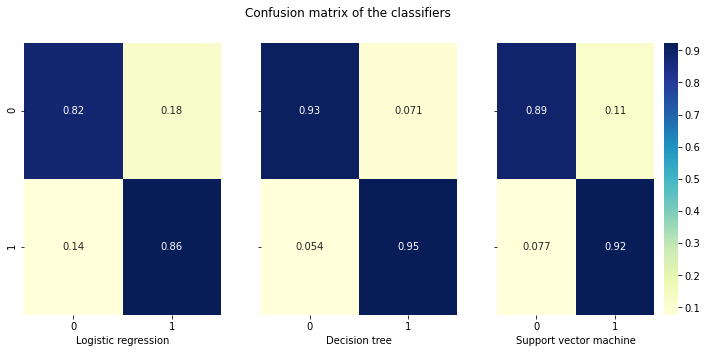

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,  figsize=(12,5))
sns.heatmap( cm_norm, annot=True, cmap='YlGnBu',cbar=False,ax=ax1).set(xlabel='Logistic regression')
sns.heatmap( cm2_norm, annot=True, cmap='YlGnBu',cbar=False,ax=ax2).set(xlabel='Decision tree')
sns.heatmap( cm1_norm, annot=True, cmap='YlGnBu',ax=ax3).set(xlabel='Support vector machine')
f.suptitle("Confusion matrix of the classifiers")

plt.show()